# Preprocessing for simulation 0

## Effects at phylum level

@ Aug. 16, Youngwon (youngwon08@gmail.com)

In [1]:
import pandas as pd
import numpy as np
from sklearn.utils.extmath import softmax as softmax
from scipy.special import expit as sigmoid
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = "./data/simulation/s0"
path_genus = "./data/genus48"

def relu(x): 
    x[x <= 0.] = 0.
    return x

## Phylogenetic Tree information

In [3]:
## TODO: Should we start with genus48.csv?

phylogenetic_tree_info = pd.read_csv('%s/genus48_dic.csv' % path_genus)
# tree_level_list = ['Genus', 'Family', 'Order', 'Class', 'Phylum']
tree_level_list = phylogenetic_tree_info.columns[:-1].tolist()
phylogenetic_tree_info

,Genus,Family,Order,Class,Phylum,Domain
0,Streptococcus,Streptococcaceae,Lactobacillales,Bacilli,Firmicutes,Bacteria
1,Tropheryma,Cellulomonadaceae,Actinomycetales,Actinobacteria,Actinobacteria,Bacteria
2,Veillonella,Veillonellaceae,Selenomonadales,Negativicutes,Firmicutes,Bacteria
3,Actinomyces,Actinomycetaceae,Actinomycetales,Actinobacteria,Actinobacteria,Bacteria
4,Flavobacterium,Flavobacteriaceae,Flavobacteriales,Flavobacteria,Bacteroidetes,Bacteria
5,Prevotella,Prevotellaceae,Bacteroidales,Bacteroidia,Bacteroidetes,Bacteria
6,Porphyromonas,Porphyromonadaceae,Bacteroidales,Bacteroidia,Bacteroidetes,Bacteria
7,Parvimonas,Clostridiales_Incertae_Sedis_XI,Clostridiales,Clostridia,Firmicutes,Bacteria
8,Fusobacterium,Fusobacteriaceae,Fusobacteriales,Fusobacteria,Fusobacteria,Bacteria
9,Propionibacterium,Propionibacteriaceae,Actinomycetales,Actinobacteria,Actinobacteria,Bacteria


In [4]:
print('------------------------------------------------------------------------------------------')
print('Phylogenetic tree level list: %s' % tree_level_list)
print('------------------------------------------------------------------------------------------')
phylogenetic_tree_dict = {'Number':{}}
for tree_lvl in tree_level_list:
    lvl_category = phylogenetic_tree_info[tree_lvl].unique()
    lvl_num = lvl_category.shape[0]
    print('%6s: %d' % (tree_lvl, lvl_num))
    phylogenetic_tree_dict[tree_lvl] = dict(zip(lvl_category, np.arange(lvl_num)))
    phylogenetic_tree_dict['Number'][tree_lvl]=lvl_num
print('------------------------------------------------------------------------------------------')
print('Phylogenetic_tree_dict info: %s' % list(phylogenetic_tree_dict.keys()))
print('------------------------------------------------------------------------------------------')

------------------------------------------------------------------------------------------
Phylogenetic tree level list: ['Genus', 'Family', 'Order', 'Class', 'Phylum']
------------------------------------------------------------------------------------------
 Genus: 48
Family: 40
 Order: 23
 Class: 17
Phylum: 9
------------------------------------------------------------------------------------------
Phylogenetic_tree_dict info: ['Number', 'Family', 'Phylum', 'Class', 'Genus', 'Order']
------------------------------------------------------------------------------------------


In [5]:
phylogenetic_tree = phylogenetic_tree_info.iloc[:,:-1]
for tree_lvl in tree_level_list:
    phylogenetic_tree[tree_lvl] = phylogenetic_tree[tree_lvl].map(phylogenetic_tree_dict[tree_lvl])
phylogenetic_tree = np.array(phylogenetic_tree)
phylogenetic_tree

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

array([[ 0,  0,  0,  0,  0],
       [ 1,  1,  1,  1,  1],
       [ 2,  2,  2,  2,  0],
       [ 3,  3,  1,  1,  1],
       [ 4,  4,  3,  3,  2],
       [ 5,  5,  4,  4,  2],
       [ 6,  6,  4,  4,  2],
       [ 7,  7,  5,  5,  0],
       [ 8,  8,  6,  6,  3],
       [ 9,  9,  1,  1,  1],
       [10, 10,  7,  0,  0],
       [11, 11,  1,  1,  1],
       [12, 12,  0,  0,  0],
       [13, 13,  8,  7,  4],
       [14, 14,  0,  0,  0],
       [15,  2,  2,  2,  0],
       [16, 15,  5,  5,  0],
       [17, 16,  9,  1,  1],
       [18, 17, 10,  8,  4],
       [19,  4,  3,  3,  2],
       [20, 18, 11,  9,  0],
       [21, 15,  5,  5,  0],
       [22, 19, 12, 10,  5],
       [23, 20,  7,  0,  0],
       [24, 21,  5,  5,  0],
       [25, 15,  5,  5,  0],
       [26, 22, 13,  7,  4],
       [27, 23,  6,  6,  3],
       [28, 24, 14, 11,  6],
       [29, 25, 15, 12,  4],
       [30, 26, 16, 12,  4],
       [31,  2,  2,  2,  0],
       [32, 27,  1,  1,  1],
       [33, 28, 17, 13,  4],
       [34, 29

In [6]:
tree_weight_list = []
tree_weight_noise_list = []
num_dict = phylogenetic_tree_dict['Number']
for i in range(len(tree_level_list)-1):
    print('Build edge weights between [%6s, %6s]'%(tree_level_list[i],tree_level_list[i+1]))
    lower = phylogenetic_tree[:,i]
    upper = phylogenetic_tree[:,i+1]
    n_lower = num_dict[tree_level_list[i]]
    n_upper = num_dict[tree_level_list[i+1]]

    tree_w = np.zeros((n_lower,n_upper))
    tree_w_n = np.zeros_like(tree_w) + 0.01
    for j in range(n_upper):
        tree_w[lower[j==upper],j] = 1.
        tree_w_n[lower[j==upper],j] = 1.
    tree_weight_list.append(tree_w)
    tree_weight_noise_list.append(tree_w_n)

Build edge weights between [ Genus, Family]
Build edge weights between [Family,  Order]
Build edge weights between [ Order,  Class]
Build edge weights between [ Class, Phylum]


### Check Error

In [7]:
maskw_l1 = np.array(pd.read_csv('%s/mw1.csv' % path))
maskw_l2 = np.array(pd.read_csv('%s/mw2.csv' % path))
maskw_l3 = np.array(pd.read_csv('%s/mw3.csv' % path))
maskw_l4 = np.array(pd.read_csv('%s/mw4.csv' % path))
maskw_list = [maskw_l1,maskw_l2,maskw_l3,maskw_l4]
print([np.sum(np.abs(tw-mw)) for tw, mw in zip(tree_weight_noise_list, maskw_list)])

[0.0, 0.0, 0.0, 0.0]


# Regression effected with phylum level selections

Aug. 10, 2019

## Experiments with 1000 replications

## Generating X: microbiome abundance data
* Using the data that Jing made, described in detail by Zhai et al. (2018a,b).
    * $n \times p$ OTU count matrix
    * Aggregating $p_0=2964$ OTUs to $p=48$ genus
* Sample size for each replication: $n = 1000$
    * Training $75%$; Test $25%$

* Phylogenetic tree levels:
    1. Genus: $m^0 = 48$
    1. Family: $m^1 = 40$
    1. Order: $m^2 = 23$
    1. Class: $m^3 = 17$
    1. Phylum: $m^4 = 9$

## Generation Y: a forward propagation approach

###  Ver 0: same weights with same true connection for each repeatition

#### (similar to the original version)

$x^0 = x^{input} \in \mathbb{R}^{n\times p}$ (input genus abundance data)

#### Before repeatition, 

* Select the true connection to disease (based on the phylogenetic tree information)
    1. Choose 4 indexes from the order nodes
    1. Construct the disease path according to the chosen order nodes.

* Construct the true weights. 
    1. For $i = 1,2,...,5$, $w^{i} \in \mathbb{R}^{m^{i-1} \times m^{i}}, b^{i} \in \mathbb{R}^{m^{i} \times 1},$
       $$w^{i}_{j,k} \sim \left\{\begin{matrix}
       \text{Uniform}(-4.5,3) \quad\quad  \text{associated with the disease} \\
%        \mathcal{N}(0,0.0001) \quad\quad  \text{not associaated with the disease} \\
       0 \quad\quad  \text{not associaated with the disease} \\
       0 \quad\quad\quad \text{not associaated with the phylogenetic trees}
       \end{matrix}\right.$$
       $$b^{i}_{k} \sim \mathcal{N}(0,4)$$

#### For each repeatition, 

* For $i = 1,2,...,4$,
    1. $h^i = w^{i} x^{i-1} + b^i$
    1. $x^{i} = \text{ReLU}(h^i) \in \mathbb{R}^{m^{i}}$
* For the last layer for the classification with the K classes:
    1. $y=x^{5} = w^{5}x^{4}+b^{5} + \epsilon$ where $$\epsilon \sim \mathcal{N}(0, 1)$$

In [8]:
verbose=False
count_path = 'data/simulation/count/'
x_list = np.array(pd.read_csv('data/simulation/gcount_list.csv', header=None)[0])
np.random.seed(10)
print('-------------------------------------------------------------------------------')
print('Generation True Connection to disease')
# order_idx = np.array([5,4,1,9]) # 5(0) and 4(2) are effect at order level, 1(1) and 9(1) are effects at phylum level
phylum_idx = np.array([1,0,2]) # 1(1, 9) are effect at phylum level, 0(6) and 2(5) are effects at order level

true_tree_idx_list = []
for i in range(5):
#     idx_order = np.unique(np.concatenate([phylogenetic_tree[:,i][phylogenetic_tree[:,2]==k] for k in order_idx]))
    idx = np.unique(np.concatenate([phylogenetic_tree[:,i][phylogenetic_tree[:,4]==k] for k in phylum_idx]))
#     idx = np.intersect1d(idx_order, idx_phylum)
    print("%6s idx: %s"% (tree_level_list[i], idx))
    true_tree_idx_list.append(idx)
print('------------------------------------------------------------------------------------------')
true_tree_weight_list = []
num_dict = phylogenetic_tree_dict['Number']
for i in range(len(tree_level_list)-1):
    print('Build true edge weights between [%6s, %6s]'%(tree_level_list[i],tree_level_list[i+1]))
    lower = phylogenetic_tree[:,i]
    upper = phylogenetic_tree[:,i+1]
    n_lower = num_dict[tree_level_list[i]]
    n_upper = num_dict[tree_level_list[i+1]]
    tree_w = np.zeros((n_lower,n_upper), dtype=np.float32)
    for j in true_tree_idx_list[i]:
        tree_w[j,upper[lower==j]] = 1.
    true_tree_weight_list.append(tree_w)
    np.save('%s/ver0/tw_%d.npy'%(path,i+1), np.repeat([tree_w], x_list.shape[0], axis=0))
    print('Saved true edge weights between [%6s, %6s] to %s/ver0/tw_%d.npy'%(tree_level_list[i],tree_level_list[i+1],path,i+1))

print('-------------------------------------------------------------------------------')
print('Generation y')

yweight_list = []
ybias_list = []
for i in range(len(true_tree_weight_list)):
    yw = np.random.uniform(-4.5,3., true_tree_weight_list[i].shape).astype(np.float32) * true_tree_weight_list[i] # left only the weights on the true connections to the disease
    yb = np.random.normal(0,4, true_tree_weight_list[i].shape[-1]).astype(np.float32)
    yw = np.repeat([yw], x_list.shape[0], axis=0)
    yb = np.repeat([yb], x_list.shape[0], axis=0)
    yweight_list.append(yw)
    ybias_list.append(yb)
    np.save('%s/ver0/solw_%d.npy'%(path,i), yw)
    np.save('%s/ver0/solb_%d.npy'%(path,i), yb)
    
ywc = np.zeros((true_tree_weight_list[3].shape[-1],1), dtype=np.float32)
ywc[:3,0] = np.random.uniform(-4.5,3., 3).astype(np.float32)
# ywc = np.expand_dims(np.array([-0.025, 0.15, -0.35, 0, 0, 0, 0, 0, 0]), axis=-1)
ywc[:,0] = ywc[:,0] * (np.sum(true_tree_weight_list[-1], axis=0) > 0).astype(np.float32)
ywc = np.repeat([ywc], x_list.shape[0], axis=0)
ybc = np.random.normal(0,4, ywc.shape[-1]).astype(np.float32)
ybc = np.repeat([ybc], x_list.shape[0], axis=0) 
np.save('%s/ver0/solw_%d.npy'%(path,len(true_tree_weight_list)), ywc)
# np.save('%s/ver0/solb_%d.npy'%(path,len(true_tree_weight_list)), ybc)

newy_all = []
for fold in range(x_list.shape[0]):
    x = pd.read_csv('%s/%s'%(count_path, x_list[fold])) # input x
    mat = np.matrix(x)
    prepro = MinMaxScaler()
    prepro.fit(mat)
    x = pd.DataFrame(prepro.transform(mat), columns = list(x.columns))
    h = np.array(x, dtype=np.float32)
    for i, (yw, yb) in enumerate(zip(yweight_list,ybias_list)):
        yw_noise = yw[fold]
#         yw_noise += np.random.normal(0,0.0001, true_tree_weight_list[i].shape) \
#                     *(1.-true_tree_weight_list[i])*(tree_weight_list[i]) # add noise on the tree
        h = relu(np.dot(h, yw_noise) + np.repeat([yb[fold]], h.shape[0], axis=0))
    h = np.dot(h, ywc[fold])
    p = h + np.repeat([ybc[fold]], h.shape[0], axis=0)
    p += np.random.normal(0,1)
    newy = p[:,0]
    newy_all.append(newy)
newy_all = pd.DataFrame(np.stack(newy_all).T)
newy_all.to_csv('%s/ver0/y.csv'%path, index=False)
np.save('%s/ver0/solb_%d.npy'%(path,len(true_tree_weight_list)), ybc)

-------------------------------------------------------------------------------
Generation True Connection to disease
 Genus idx: [ 0  1  2  3  4  5  6  7  9 10 11 12 14 15 16 17 19 20 21 23 24 25 31 32
 37 38 40 41 44 46 47]
Family idx: [ 0  1  2  3  4  5  6  7  9 10 11 12 14 15 16 18 20 21 27 32 34 38 39]
 Order idx: [ 0  1  2  3  4  5  7  9 11]
 Class idx: [0 1 2 3 4 5 9]
Phylum idx: [0 1 2]
------------------------------------------------------------------------------------------
Build true edge weights between [ Genus, Family]
Saved true edge weights between [ Genus, Family] to ./data/simulation/s0/ver0/tw_1.npy
Build true edge weights between [Family,  Order]
Saved true edge weights between [Family,  Order] to ./data/simulation/s0/ver0/tw_2.npy
Build true edge weights between [ Order,  Class]
Saved true edge weights between [ Order,  Class] to ./data/simulation/s0/ver0/tw_3.npy
Build true edge weights between [ Class, Phylum]
Saved true edge weights between [ Class, Phylum] to ./

/DATA/home/muha/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [9]:
newy_all

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-25.005516,-28.248390,-29.506063,-29.745853,-29.300184,-27.937754,-31.108492,-38.249619,-31.313839,-51.670509,...,-29.167797,-29.660692,-26.480015,-39.632248,-27.844797,-30.142477,-32.244537,-27.955473,-29.276134,-27.136677
1,-25.976873,-27.973913,-31.102421,-29.525259,-20.609529,-30.985304,-27.172899,-28.560678,-28.021658,-26.928057,...,-27.761417,-38.493530,-19.627054,-27.686003,-27.283371,-27.804092,-29.721542,-33.868217,-31.368763,-34.908268
2,-28.481565,-26.610697,-27.157104,-31.214149,-28.190340,-28.190445,-26.161022,-30.498369,-39.250732,-26.377237,...,-29.599127,-29.911922,-45.847157,-22.472687,-24.592016,-27.973072,-30.567966,-29.237204,-29.226233,-27.687120
3,-26.662779,-28.055695,-28.914339,-30.523798,-28.605684,-27.203697,-27.707420,-27.705317,-27.973633,-33.633045,...,-47.470173,-27.510750,-28.450851,-28.058084,-29.868484,-28.343035,-27.241793,-28.452826,-29.881163,-28.215473
4,-25.182056,-29.295477,-27.066933,-29.890114,-26.447096,-25.912653,-25.900858,-27.821133,-31.443441,-27.261732,...,-29.898642,-29.335354,-30.768524,-28.161871,-29.544323,-28.802050,-29.921856,-27.944937,-28.781843,-26.678045
5,-32.818115,-34.679913,-26.785637,-50.575756,-29.189718,-27.225821,-29.038788,-28.115284,-28.319727,-28.672403,...,-29.425556,-29.714899,-27.576021,-28.454845,-28.735388,-28.153362,-29.110939,-27.334723,-37.398243,-28.705385
6,-25.321007,-29.928091,-28.178671,-36.057068,-35.457054,-27.304874,-49.476513,-28.478512,-29.230400,-28.187294,...,-28.216181,-28.257463,-30.234724,-29.485088,-28.376856,-28.178392,-31.517939,-28.384689,-31.321701,-30.082691
7,-26.182497,-30.672295,-26.884436,-31.542400,-29.655981,-26.838314,-27.357298,-28.051952,-28.269878,-30.327524,...,-31.216448,-29.845177,-33.473957,-29.333261,-27.968765,-27.728823,-34.507973,-28.211691,-26.466131,-28.670731
8,-26.058392,-29.562973,-29.082685,-29.486979,-28.259367,-27.054007,-26.443968,-24.290894,-26.694994,-26.814157,...,-26.242817,-25.921003,-28.282913,-28.746275,-29.797140,-29.739311,-30.308826,-48.953777,-31.912830,-27.447760
9,-27.767952,-31.336849,-23.512390,-32.868252,-25.481838,-27.967348,-32.135517,-26.440557,-29.681734,-29.815901,...,-36.016697,-30.199547,-25.244516,-28.351555,-29.234192,-23.281643,-29.706903,-27.831577,-28.991980,-28.195654


(array([1.90000e+01, 6.16000e+02, 1.57810e+04, 1.71180e+04, 4.57820e+04,
        5.26269e+05, 3.80353e+05, 1.25420e+04, 1.48000e+03, 4.00000e+01]),
 array([-69.17242432, -62.32384363, -55.47526294, -48.62668225,
        -41.77810156, -34.92952088, -28.08094019, -21.2323595 ,
        -14.38377881,  -7.53519812,  -0.68661743]),
 <a list of 10 Patch objects>)

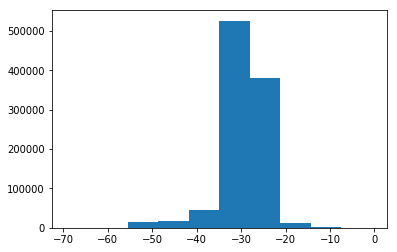

In [10]:
plt.hist(np.array(newy_all).flatten())